In [47]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import sklearn
import graphviz 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier

In [48]:
#cargo los datos
data = pd.read_csv('Carseats.csv')
#creo la nueva columna que nos piden
new_column = np.zeros(data.shape[0])
data['High'] = new_column
data['High'] = 'No'
data.loc[data['Sales']>=8,'High'] = 'Yes'
data = pd.get_dummies(data)
df = pd.DataFrame(data)

In [49]:
#separar los datasets en desarrollo (validation and training) y testing 
dev_data, test_data = train_test_split(df, test_size=0.2) # 0.2 for testing data, 0.8 for development data

# trees para la variable High - classification trees

In [52]:
#creo un tree para la variable High
#primero pongo bien los datos, sacando la columna de sales
dev_data_1 = dev_data.copy()
test_data_1 = test_data.copy()
test_data_1 = test_data_1.drop(columns='Sales')
dev_data_1 = dev_data_1.drop(columns='Sales')
#saco los feature names and class names
df_list = test_data_1.columns[:-2]
df_classes = ['No','Yes']
#separo en features y labels para test y train
x_train = dev_data_1.copy()
x_test = test_data_1.copy()
x_train = x_train.drop(columns='High_Yes') 
x_train = x_train.drop(columns='High_No') 
y_train = dev_data_1['High_Yes']
x_test = x_test.drop(columns = 'High_Yes')
x_test = x_test.drop(columns = 'High_No')
y_test = test_data_1['High_Yes']
#paso a numpy array todo
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
#creo el tree de hecho
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)
print('train acc: '+str(clf.score(x_train,y_train)))
print('test acc: '+str(clf.score(x_test,y_test)))
print('train loss: '+str(mean_squared_error(y_test,clf.predict(x_test))))
print('test loss: '+str(mean_squared_error(y_train,clf.predict(x_train))))

train acc: 1.0
test acc: 0.7125
train loss: 0.2875
test loss: 0.0


In [53]:
dot_data = tree.export_graphviz(clf, out_file=None, 
            feature_names=df_list, class_names=df_classes,filled=True, rounded=True,  
            special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("overfit_first_tree") 

'overfit_first_tree.pdf'

# trees para la variable Sales - regression trees

In [76]:
#analogo a lo anterior, sacando las columnas de high en vez de la de sales
dev_data_1 = dev_data.copy()
test_data_1 = test_data.copy()
test_data_1 = test_data_1.drop(columns='High_No')
test_data_1 = test_data_1.drop(columns='High_Yes')
dev_data_1 = dev_data_1.drop(columns='High_No')
dev_data_1 = dev_data_1.drop(columns='High_Yes')
#saco los feature names and class names para esta ocasion 
df_list = test_data_1.columns[1:]
df_classes = ['No','Yes']
#separo en features y labels para test y train analogo al caso anterior
x_train = dev_data_1.copy()
x_test = test_data_1.copy()
x_train = x_train.drop(columns='Sales') 
y_train = dev_data_1['Sales']
x_test = x_test.drop(columns = 'Sales')
y_test = test_data_1['Sales']
#paso a numpy array todo
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [77]:
#creo el tree de hecho, es un regression tree en este caso
clf = tree.DecisionTreeRegressor(random_state=0)
clf.fit(x_train,y_train)
print('train R2: '+str(clf.score(x_train,y_train)))
print('test R2: '+str(clf.score(x_test,y_test)))
print('train loss: '+str(mean_squared_error(y_test,clf.predict(x_test))))
print('test loss: '+str(mean_squared_error(y_train,clf.predict(x_train))))

train R2: 1.0
test R2: 0.153635490545464
train loss: 5.8825787499999995
test loss: 0.0


In [78]:
dot_data = tree.export_graphviz(clf, out_file=None, 
            feature_names=df_list, class_names=df_classes,filled=True, rounded=True,  
            special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("overfit_second_tree") 

'overfit_second_tree.pdf'

# cross validation para el regression tree

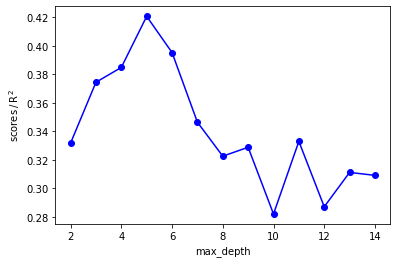

In [148]:
depths = []
scores_depth = []
for i in range(2,15):
    clf = tree.DecisionTreeRegressor(max_depth=i,random_state=0)
    scores = cross_val_score(estimator=clf, X=x_train, y=y_train, cv=5) #5-fold validation
    depths.append(i)
    scores_depth.append(scores.mean())
plt.plot(depths,scores_depth,'-ob')
plt.xlabel('max_depth')
plt.ylabel(r'$\mathrm{scores \: / \: R^2}$')
plt.savefig('validation_5fold.pdf')

In [152]:
#creo el tree de hecho, es un regression tree en este caso
clf = tree.DecisionTreeRegressor(max_depth=5,random_state=0)
clf.fit(x_train,y_train)
print('train R2: '+str(clf.score(x_train,y_train)))
print('test R2: '+str(clf.score(x_test,y_test)))
print('train loss: '+str(mean_squared_error(y_test,clf.predict(x_test))))
print('test loss: '+str(mean_squared_error(y_train,clf.predict(x_train))))

train R2: 0.7630219448461191
test R2: 0.2507856878815905
train loss: 5.207345230607605
test loss: 1.9222580991486733


In [151]:
dot_data = tree.export_graphviz(clf, out_file=None, 
            feature_names=df_list, class_names=df_classes,filled=True, rounded=True,  
            special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("third_tree") 

'third_tree.pdf'

# pruning (source: sci-kit learn)

In [153]:
clf = tree.DecisionTreeRegressor(random_state=0)
path = clf.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [154]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeRegressor(random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

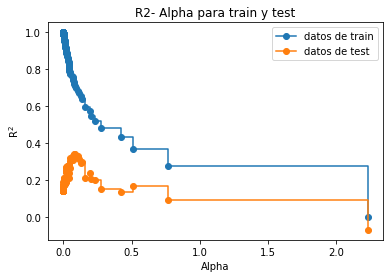

In [162]:
train_scores = [clf.score(x_train,y_train) for clf in clfs]
test_scores = [clf.score(x_test,y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel(r'Alpha')
ax.set_ylabel(r'$\mathrm{R^2}$')
ax.set_title('R2- Alpha para train y test')
ax.plot(ccp_alphas, train_scores, marker='o', label="datos de train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="datos de test",
        drawstyle="steps-post")
ax.legend()
plt.savefig('train_test_accr2alpha.pdf')

In [156]:
a = np.argmin(test_scores)
print(ccp_alphas[a])

0.07996285057923277


In [157]:
alpha_probable = ccp_alphas[a]

In [164]:
clf = tree.DecisionTreeRegressor(random_state=0, ccp_alpha=alpha_probable)
clf.fit(x_train, y_train)
print('train R2: '+str(clf.score(x_train,y_train)))
print('test R2: '+str(clf.score(x_test,y_test)))
print('test loss: '+str(mean_squared_error(y_test,clf.predict(x_test))))
print('train loss: '+str(mean_squared_error(y_train,clf.predict(x_train))))

train R2: 0.7203180214990218
test R2: 0.3395194511918993
test loss: 4.590609362520273
train loss: 2.2686528843792226


In [165]:
dot_data = tree.export_graphviz(clf, out_file=None, 
            feature_names=df_list, class_names=df_classes,filled=True, rounded=True,  
            special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("fourth_tree") 

'fourth_tree.pdf'

# bagging para reducir error de test

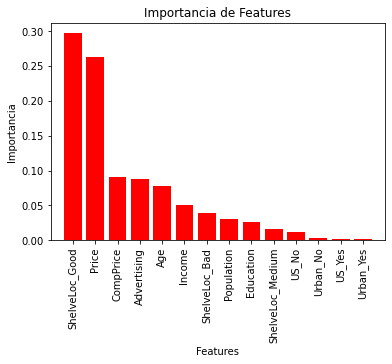

In [169]:
clf = BaggingRegressor(tree.DecisionTreeRegressor(),random_state=0)
clf.fit(x_train, y_train)
importances = np.mean([tree.feature_importances_ for tree in clf.estimators_ ], axis=0)
indices = np.argsort(importances)[::-1]
plt.figure()
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title("Importancia de Features")
plt.bar(range(x_train.shape[1]), importances[indices],
        color="r",align="center")
plt.xticks(range(x_train.shape[1]), df_list[indices],rotation='vertical')
plt.xlim([-1, x_train.shape[1]])
plt.savefig('featmap_1.pdf')
plt.show()

In [170]:
print('train R2: '+str(clf.score(x_train,y_train)))
print('test R2: '+str(clf.score(x_test,y_test)))
print('test loss: '+str(mean_squared_error(y_test,clf.predict(x_test))))
print('train loss: '+str(mean_squared_error(y_train,clf.predict(x_train))))

train R2: 0.9341450383109826
test R2: 0.6415034918396956
test loss: 2.4916970375000007
train loss: 0.53418546875


# random forest 

In [181]:
clf = RandomForestRegressor(random_state=0)
clf.fit(x_train, y_train)
print('train R2: '+str(clf.score(x_train,y_train)))
print('test R2: '+str(clf.score(x_test,y_test)))
print('test loss: '+str(mean_squared_error(y_test,clf.predict(x_test))))
print('train loss: '+str(mean_squared_error(y_train,clf.predict(x_train))))

train R2: 0.9570980196466278
test R2: 0.7002951208807053
test loss: 2.0830712222499996
train loss: 0.3480013334999998


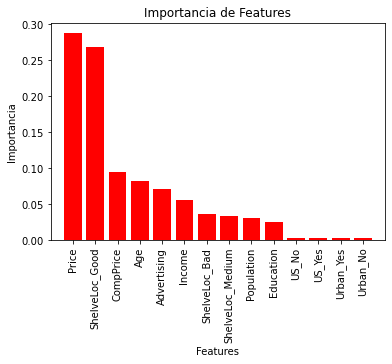

In [175]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title("Importancia de Features")
plt.bar(range(x_train.shape[1]), importances[indices],
        color="r",align="center")
plt.xticks(range(x_train.shape[1]), df_list[indices],rotation='vertical')
plt.xlim([-1, x_train.shape[1]])
plt.savefig('featmap_2.pdf')
plt.show()

In [176]:
n_feat = 14
error_feat = []
for i in range(1,n_feat+1):
    clf = RandomForestRegressor(max_features=i,random_state=0)
    clf.fit(x_train, y_train)
    error_feat.append(mean_squared_error(y_test,clf.predict(x_test)))

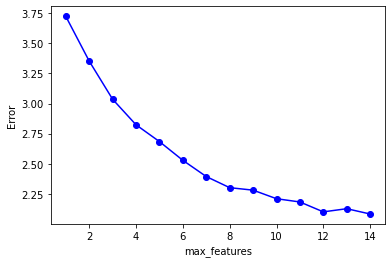

In [180]:
plt.plot(range(1,n_feat+1),error_feat,'-ob')
plt.xlabel('max_features')
plt.ylabel('Error')
plt.savefig('maxfeat_error.pdf')

In [192]:
depths = []
err_depth = []
for i in range(2,40):
    clf = RandomForestRegressor(max_depth=i,random_state=0)
    clf.fit(x_train, y_train)
    depths.append(i)
    err_depth.append(mean_squared_error(y_test,clf.predict(x_test)))

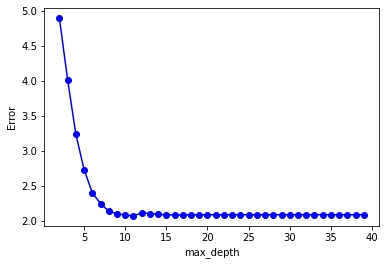

In [193]:
plt.plot(depths,err_depth,'-ob')
plt.xlabel('max_depth')
plt.ylabel('Error')
plt.savefig('maxdepth_error.pdf')

# adaboost

In [195]:
clf = AdaBoostRegressor(random_state=0)
clf.fit(x_train, y_train)
print('train R2: '+str(clf.score(x_train,y_train)))
print('test R2: '+str(clf.score(x_test,y_test)))
print('test loss: '+str(mean_squared_error(y_test,clf.predict(x_test))))
print('train loss: '+str(mean_squared_error(y_train,clf.predict(x_train))))

train R2: 0.7692874531307038
test R2: 0.6145365677980164
test loss: 2.6791281650441876
train loss: 1.871435148316769


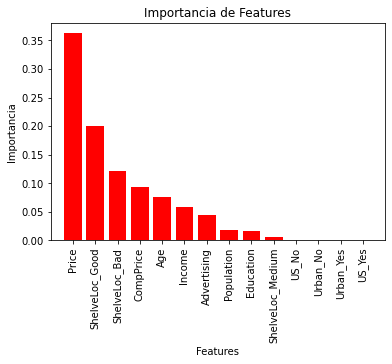

In [197]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title("Importancia de Features")
plt.bar(range(x_train.shape[1]), importances[indices],
        color="r",align="center")
plt.xticks(range(x_train.shape[1]), df_list[indices],rotation='vertical')
plt.xlim([-1, x_train.shape[1]])
plt.savefig('featmap_3.pdf')
plt.show()